# 1: UNDERSTAND THE PROBLEM STATEMENT

The objective of this case study is to predict the health insurance cost incurred by Individuals based on their age, gender, BMI, number of children, smoking habit and geo- location.

The available features are:

o sex: insurance contractor gender

o bmi: Body mass index (ideally 18.5 to 24.9)

o children: Number of children covered by health insurance / Number of dependents

o smoker: Smoking

o region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


Target (output):

o charges: Individual medical costs billed by health insurance

# 2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read the csv file
df=pd.read_csv('Data/insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3: PERFORM EXPLORATORY DATA ANALYSIS 

In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

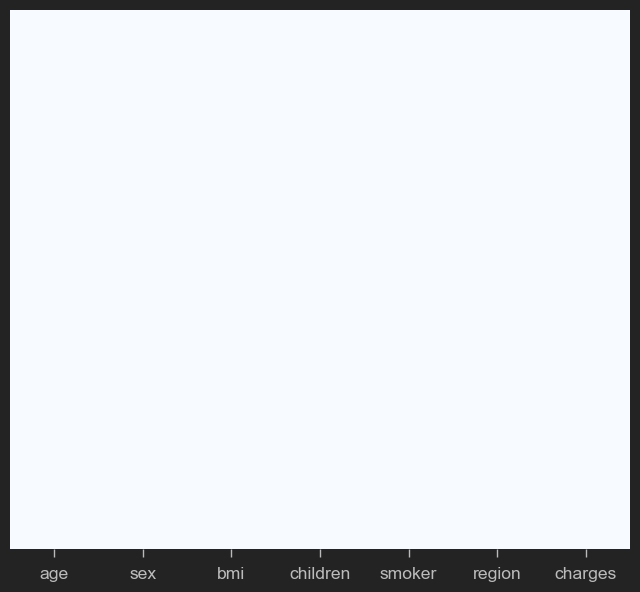

In [7]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [8]:
# check if there are any Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region=df.groupby('region').mean(numeric_only=True)
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


 **Group data by 'age' and examine the relationship between 'age' and 'charges'**


In [12]:
df_age=df.groupby(by='age').mean(numeric_only=True)
df_age
#higher the age ~higher the charges

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# 4: PERFORM FEATURE ENGINEERING

In [13]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# convert categorical variable to numerical
df['sex']=df['sex'].apply(lambda x:0 if x=='female' else 1)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [16]:
# Check the unique values in the 'smoker' column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
# Convert categorical variable to numerical
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# Check unique values in 'region' column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
region_dummies = pd.get_dummies(df['region'], drop_first = True)
#drop_first=True--drop first column.only three cols are enough to conclude

In [21]:
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [22]:
df = pd.concat([df, region_dummies], axis = 1)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,True,False,False


In [24]:
# Let's drop the original 'region' column
df.drop(['region'], axis = 1, inplace = True)


In [25]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# 5: PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoker'}>]], dtype=object)

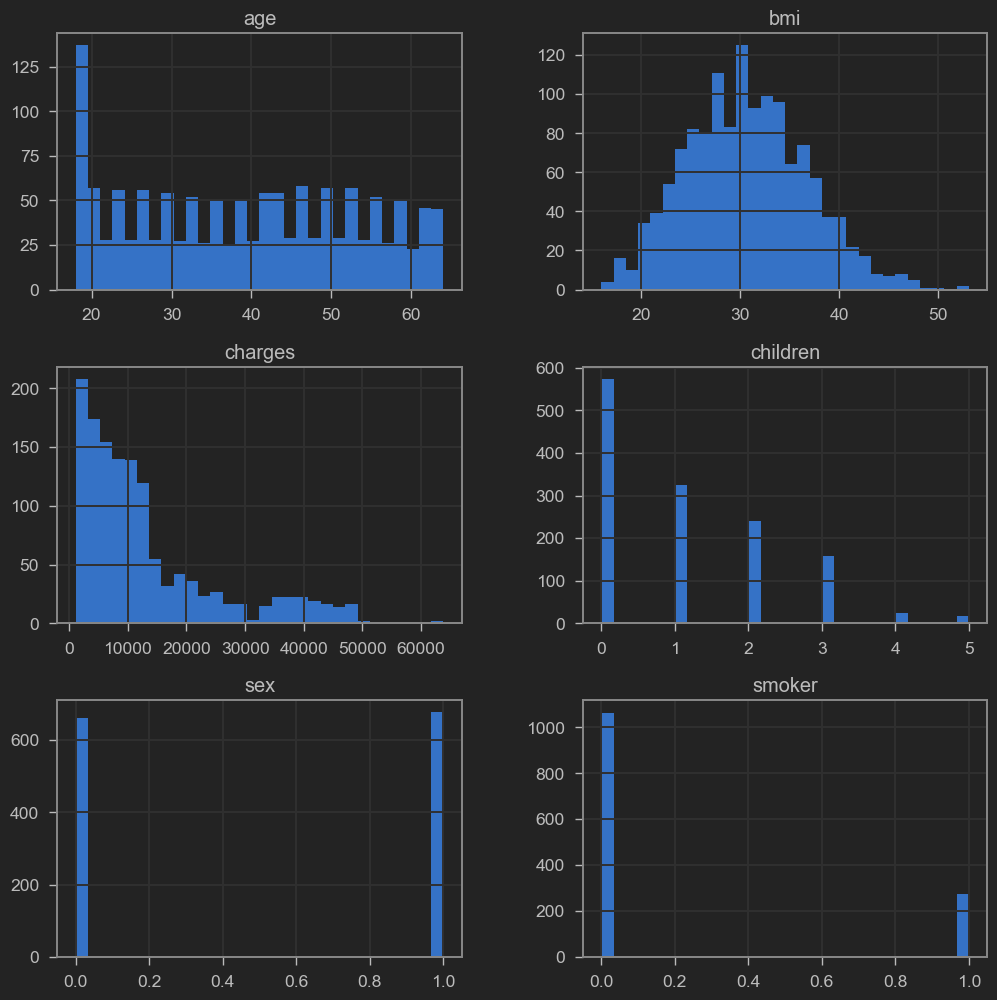

In [26]:
df[['age','bmi','charges','children','sex','smoker']].hist(bins=30,figsize=(12,12))
#bins=no> of bars
#hist to know distributions

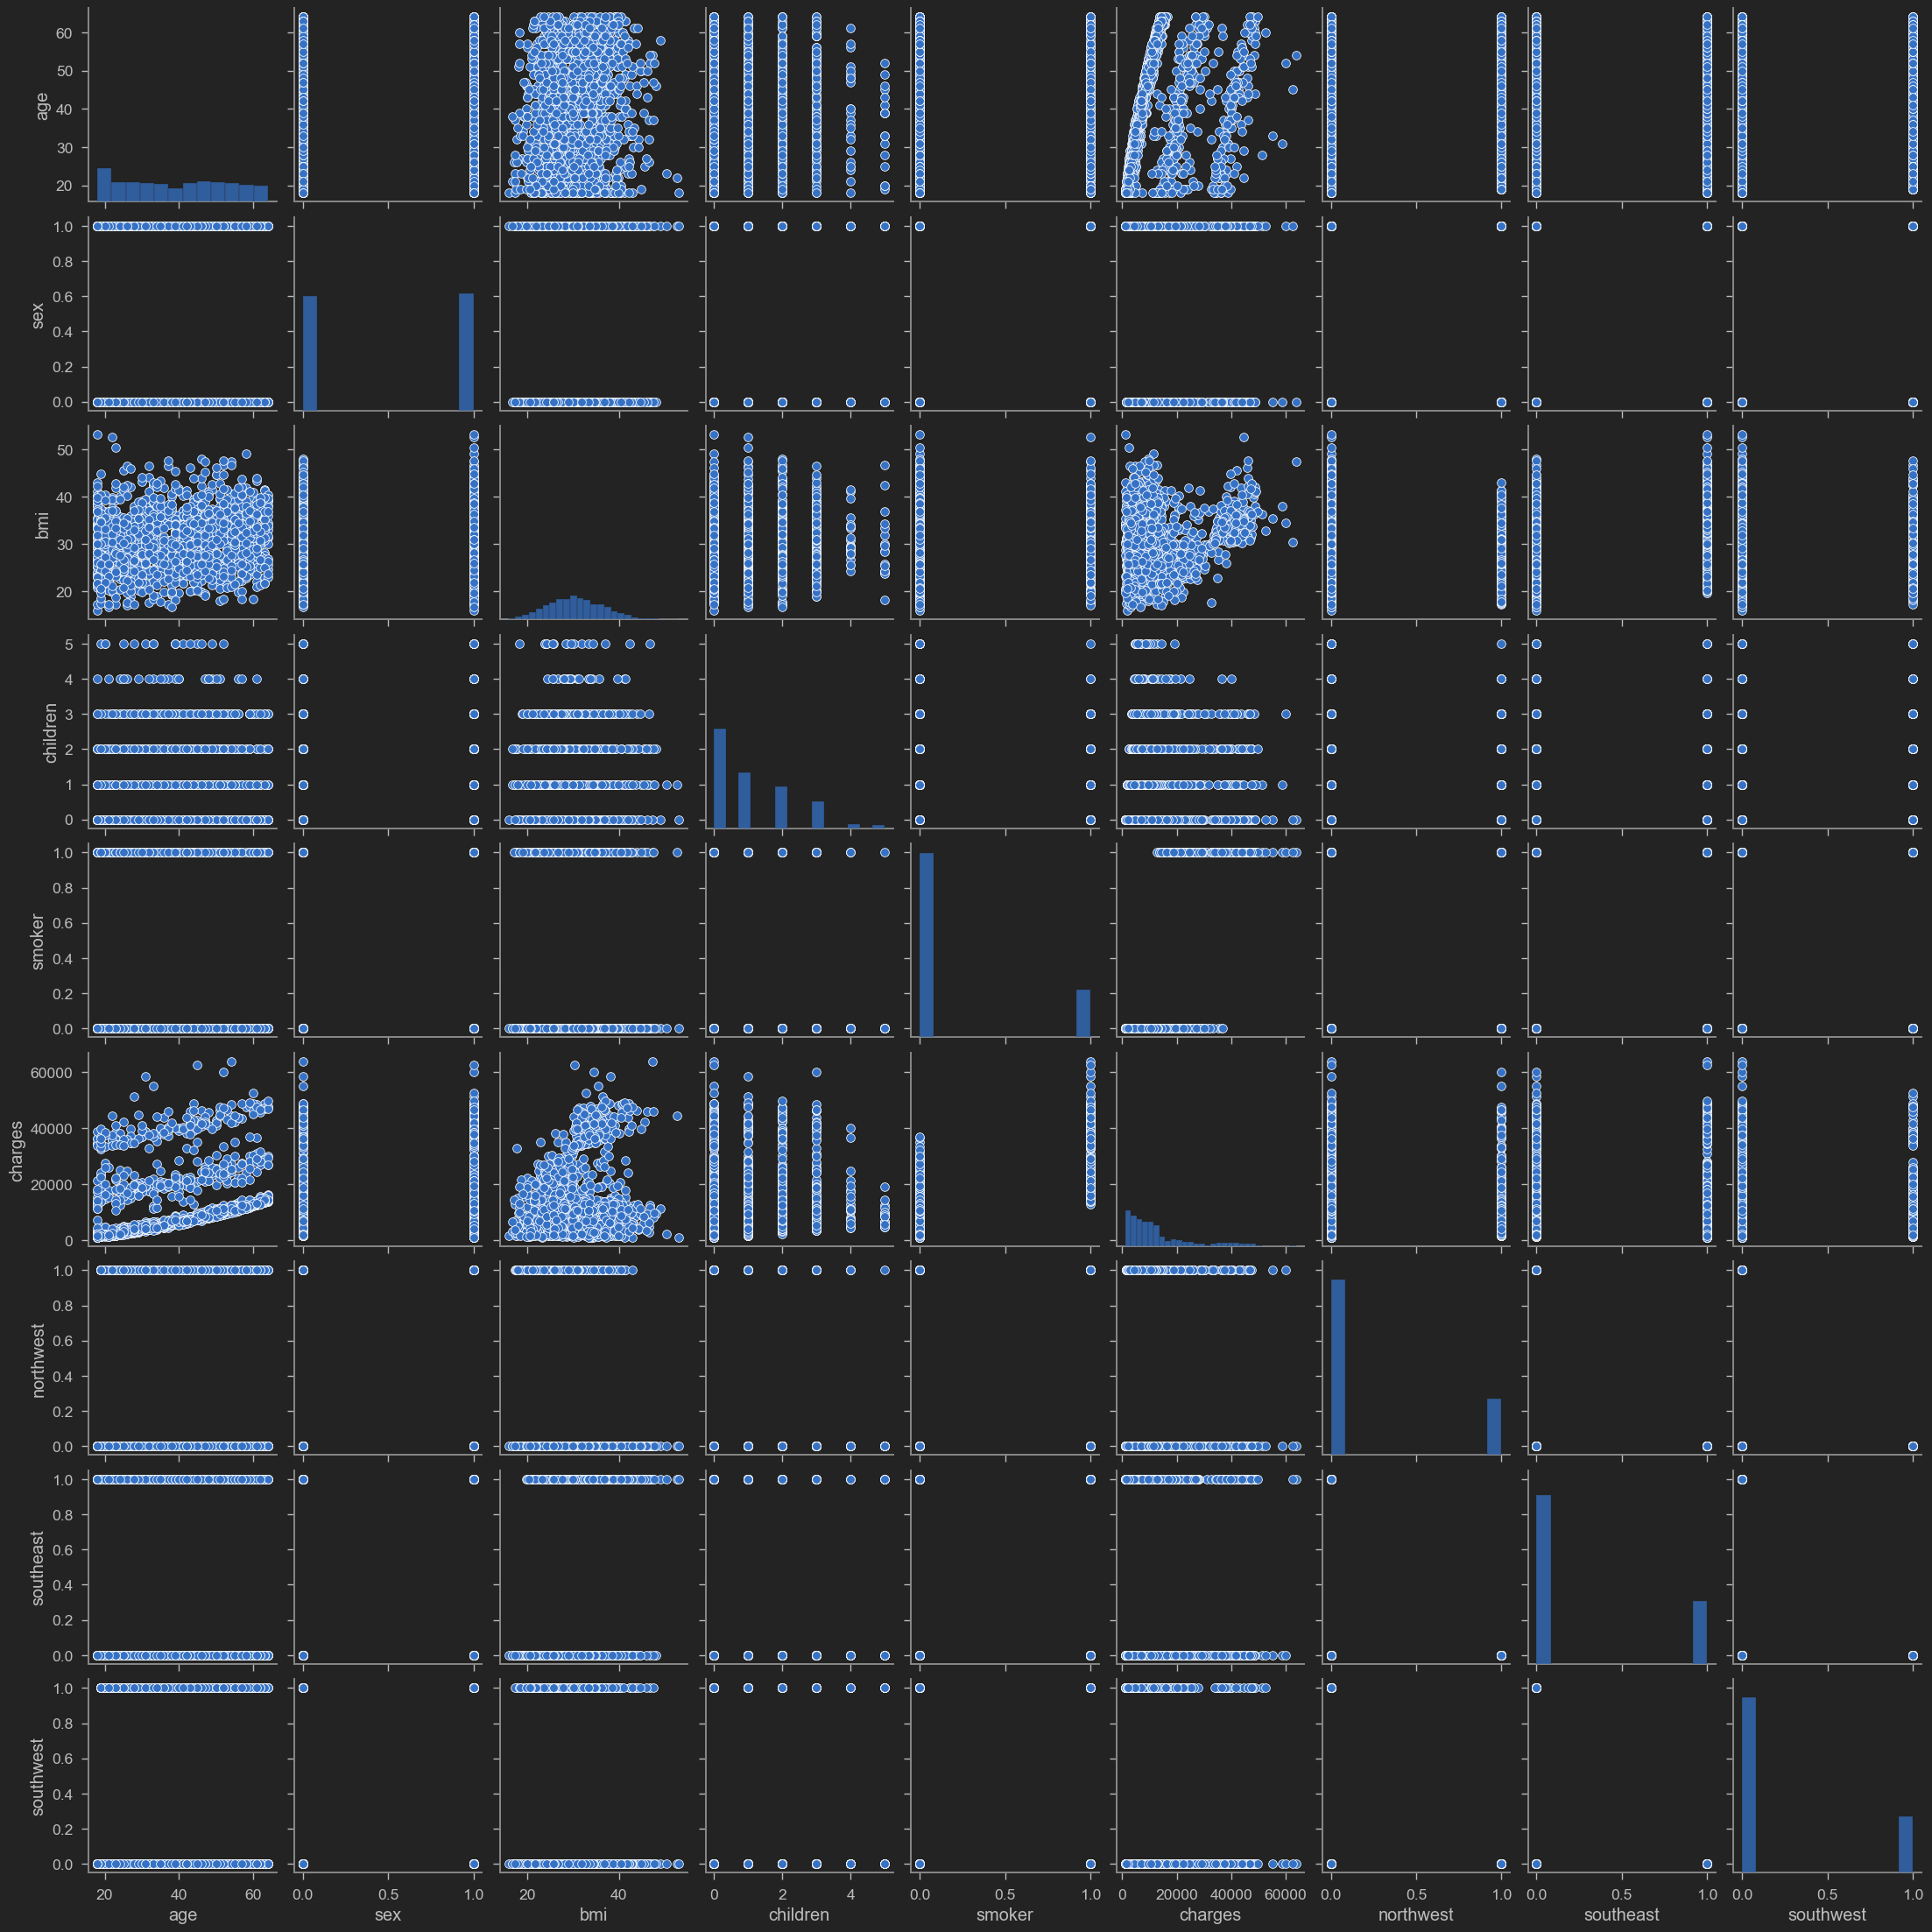

In [27]:
# plot pairplot

sns.pairplot(df)

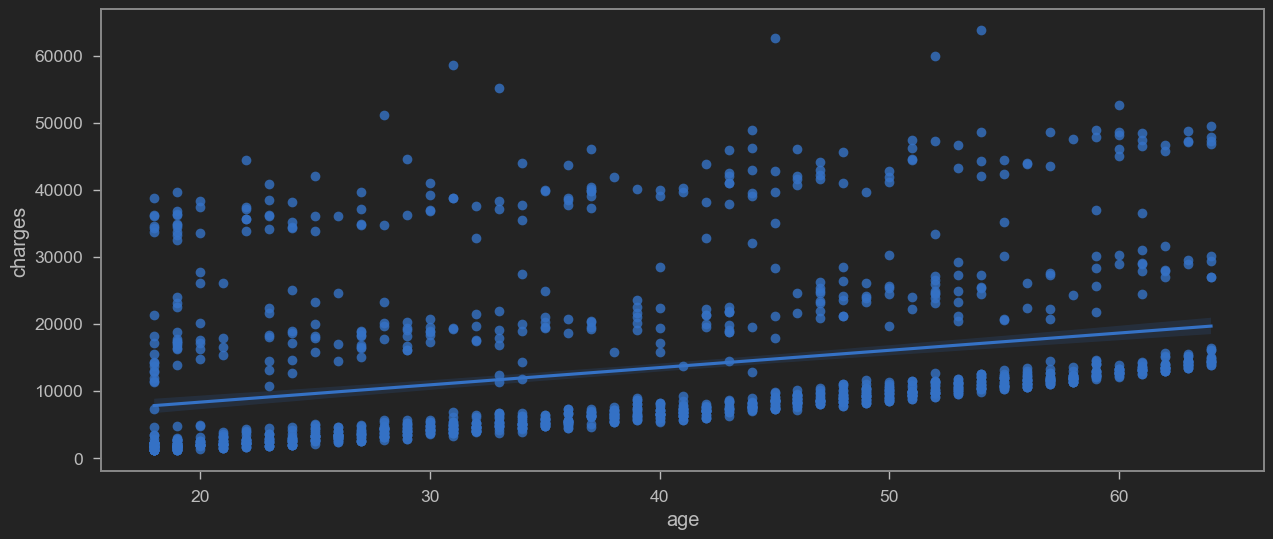

In [28]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = df)
plt.show()


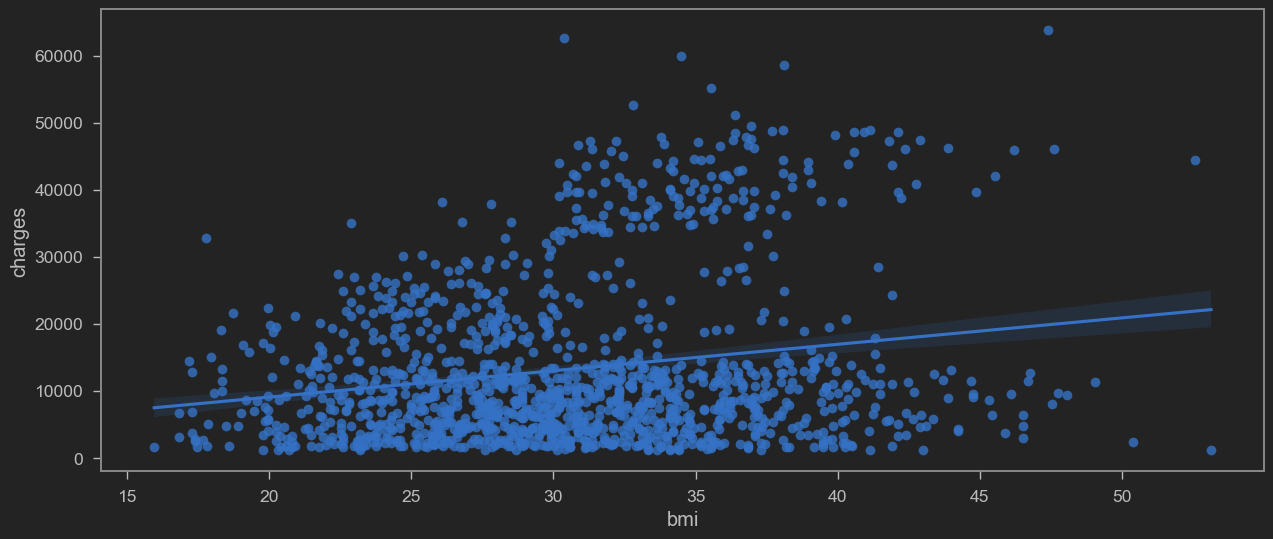

In [29]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = df)
plt.show()



 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [30]:

df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

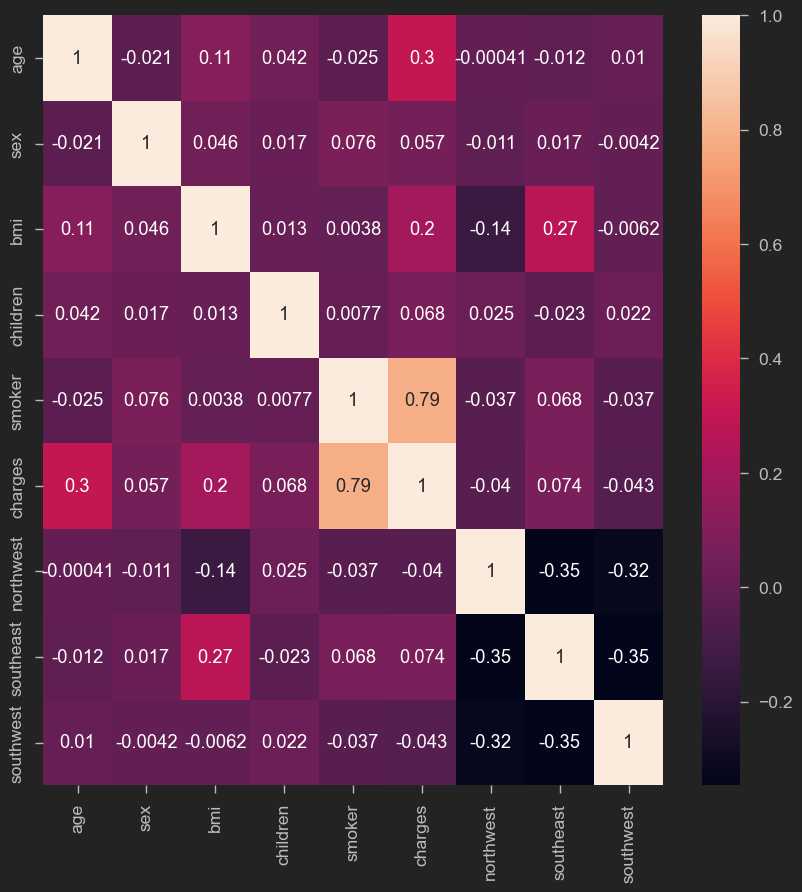

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
#annot=True--values in cells

Her we can conclude age,bmi,smoking habit affects pricing

# 6: CREATE TRAINING AND TESTING DATASET

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [33]:
X=df.drop(columns=['charges'])
y=df['charges']

In [34]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,True,False,False
1334,18,0,31.920,0,0,False,False,False
1335,18,0,36.850,0,0,False,True,False
1336,21,0,25.800,0,0,False,False,True


In [35]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
X.shape

(1338, 8)

In [37]:
y.shape

(1338,)

In [38]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [39]:
y = y.reshape(-1,1)


In [40]:
y.shape

(1338, 1)

In [41]:
# Only take the numerical variables and scale them
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [45]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
#standard scaler --used to resize distribution values so that mean of observed val is 0 and sd is 1


- **Split the data into 20% Testing and 80% Training**


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
#random_state==shuffle ds and anyone using same randomstate gets same shuffled dataset
#1,2,3,4,5
#no rand state 1.1,3   2.3,4 and ...
#same rand state-same dataset 1,3  1,3
print(X_train.shape,X_test.shape)

(1070, 8) (268, 8)


# 7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [47]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [48]:
lin_reg_accuracy = lin_reg.score(X_test, y_test)
lin_reg_accuracy

0.6953286376610375

In [49]:
y_predict = lin_reg.predict(X_test)

In [50]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
#we transformed the data,now we will transform it into real form

In [51]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.54 
MSE = 0.29158977 
MAE = 0.37628385 
R2 = 0.6953286375471976 
Adjusted R2 = 0.685917939093057


# 8: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [54]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
#input-dim=no.of col of i/p
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 50)                    │         450 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation (Activation)            │ (None, 50)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 150)                   │       7,650 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_1 (Activation)          │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 150)                   │      22,650 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_2 (Activation)          │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 50)                    │       7,550 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_3 (Activation)          │ (None, 50)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist=ANN_model.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6314 - val_loss: 0.2115
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1602 - val_loss: 0.1731
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1548 - val_loss: 0.1722
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1387 - val_loss: 0.1861
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1395 - val_loss: 0.1766
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1271 - val_loss: 0.1718
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1245 - val_loss: 0.1823
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1174 - val_loss: 0.1753
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1323 - val_loss: 0.1791
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1098 - val_loss: 0.1831
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1140 - val_loss: 0.1856
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [56]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2655 
Accuracy : 0.7110360860824585


In [57]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

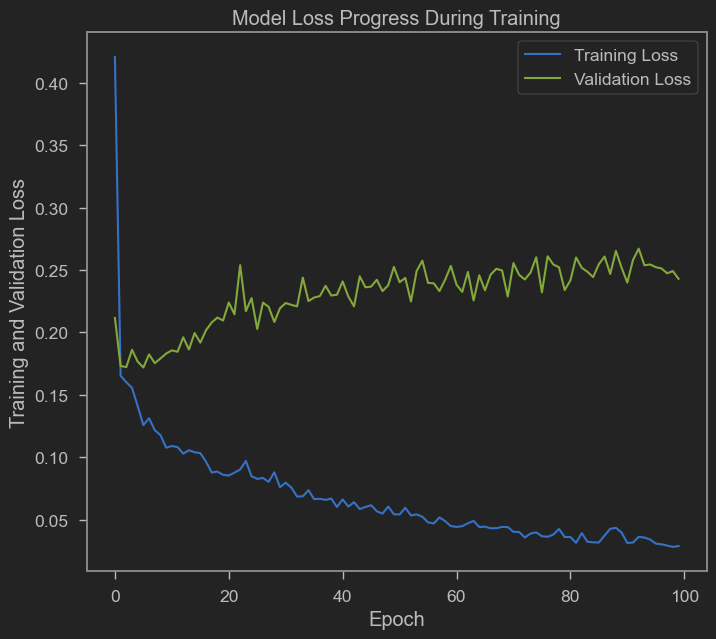

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Text(0, 0.5, 'True Values')

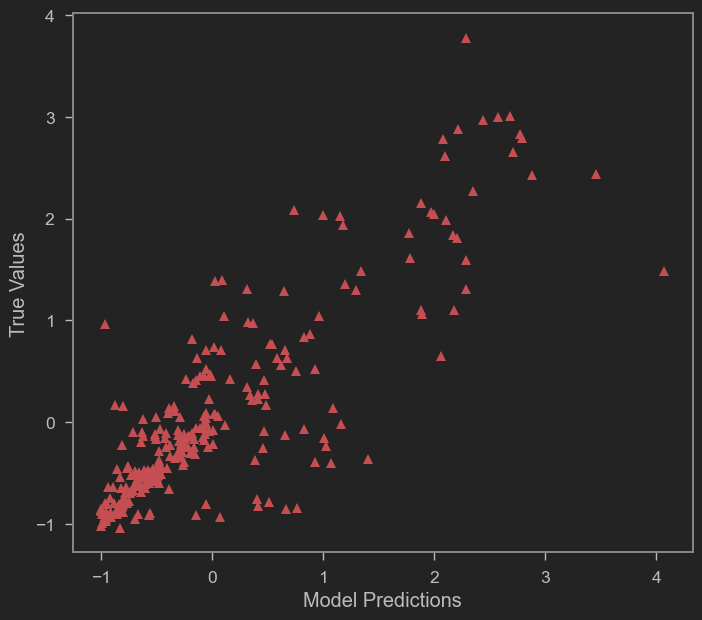

In [59]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
#good model-- straight line--45deg

In [60]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

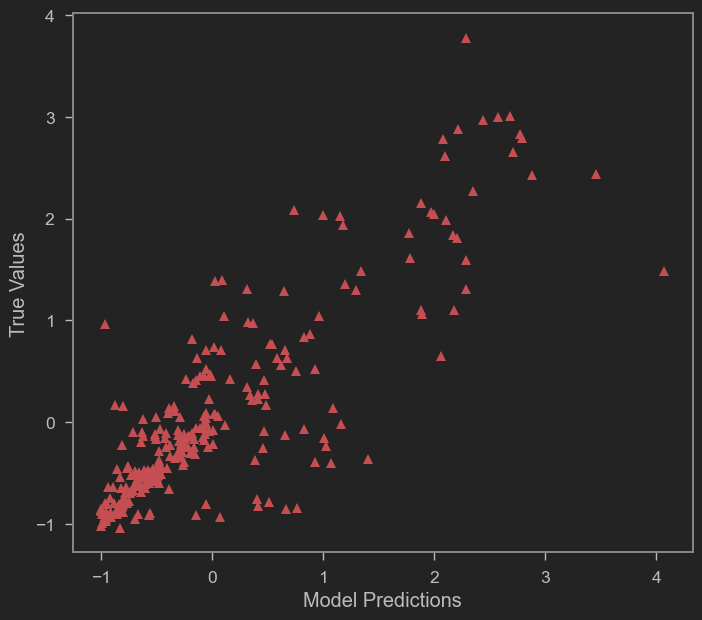

In [61]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [62]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.526 
MSE = 0.2763862 
MAE = 0.32251978 
R2 = 0.7112142610889329 
Adjusted R2 = 0.7022942382654251



- **Dropout is a regularization technique that is used to improve the network generalization ability. Experiment adding dropout layers to enahnce network generalization ability**
- **Retrain the network and assess its performance**

In [63]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_5 (Dense)                    │ (None, 50)                    │         450 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_4 (Activation)          │ (None, 50)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_6 (Dense)                    │ (None, 150)                   │       7,650 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_5 (Activation)          │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_7 (Dense)                    │ (None, 150)                   │      22,650 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_6 (Activation)          │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_8 (Dense)                    │ (None, 50)                    │       7,550 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_7 (Activation)          │ (None, 50)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_9 (Dense)                    │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist=ANN_model.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.0472 - val_loss: 0.3056
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4907 - val_loss: 0.2687
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3146 - val_loss: 0.2194
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3203 - val_loss: 0.2125
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2754 - val_loss: 0.1901
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2743 - val_loss: 0.2391
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2032 - val_loss: 0.1870
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2457 - val_loss: 0.1923
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2039 - val_loss: 0.1839
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2531 - val_loss: 0.1770
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2156 - val_loss: 0.1912
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [65]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2118 
Accuracy : 0.7877872884273529


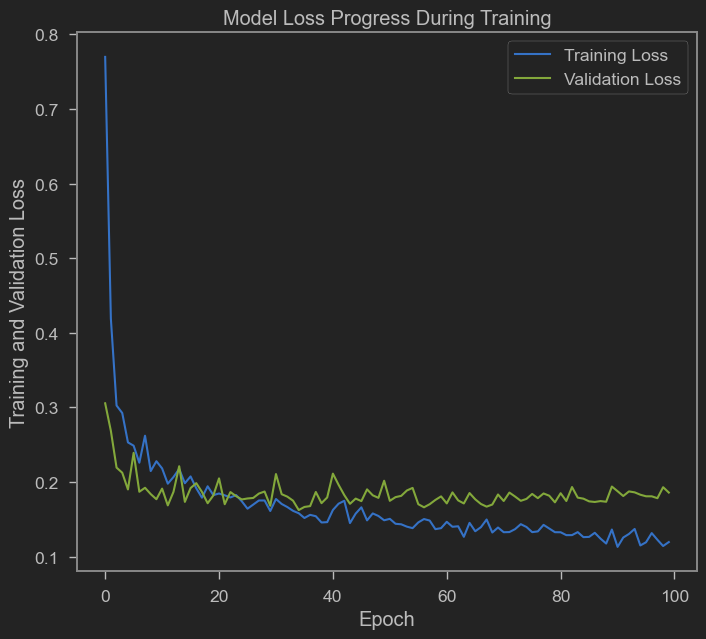

In [66]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Text(0, 0.5, 'True Values')

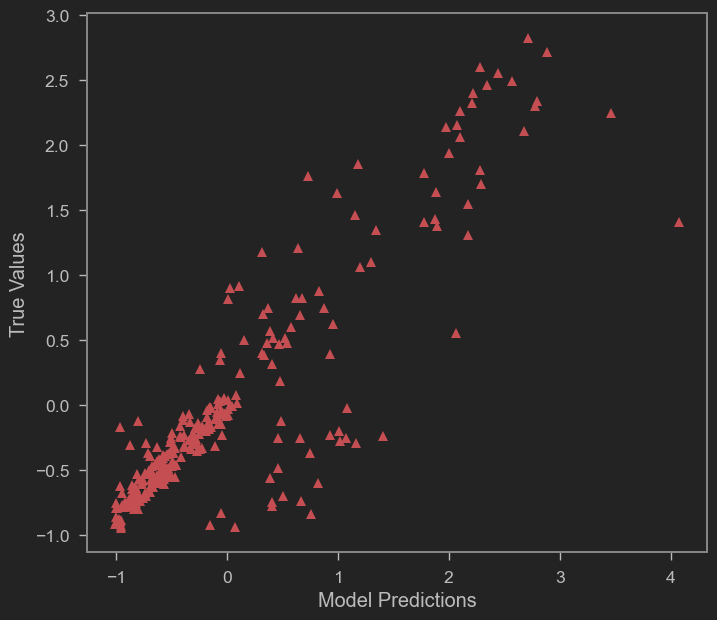

In [67]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
#good model-- straight line--45deg

In [68]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

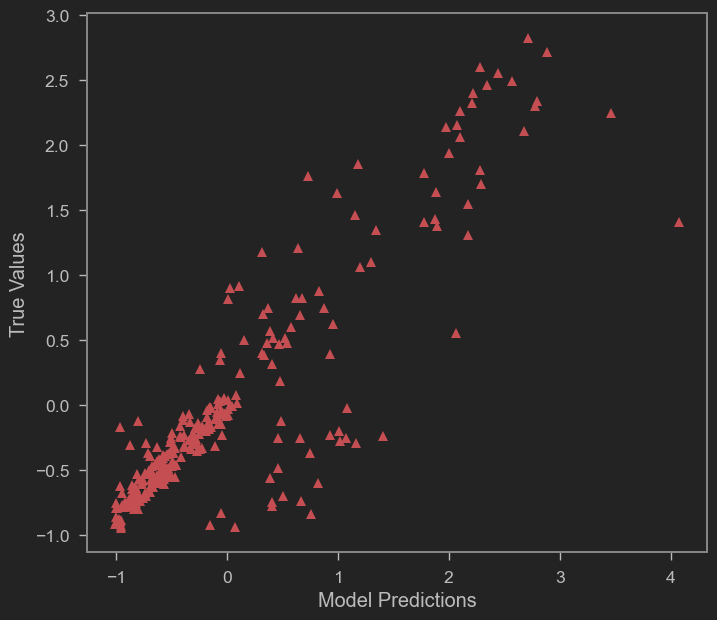

In [69]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [70]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.457 
MSE = 0.20861933 
MAE = 0.26644534 
R2 = 0.7820213663351907 
Adjusted R2 = 0.7752884355656213


Text(0, 0.5, 'True Values')

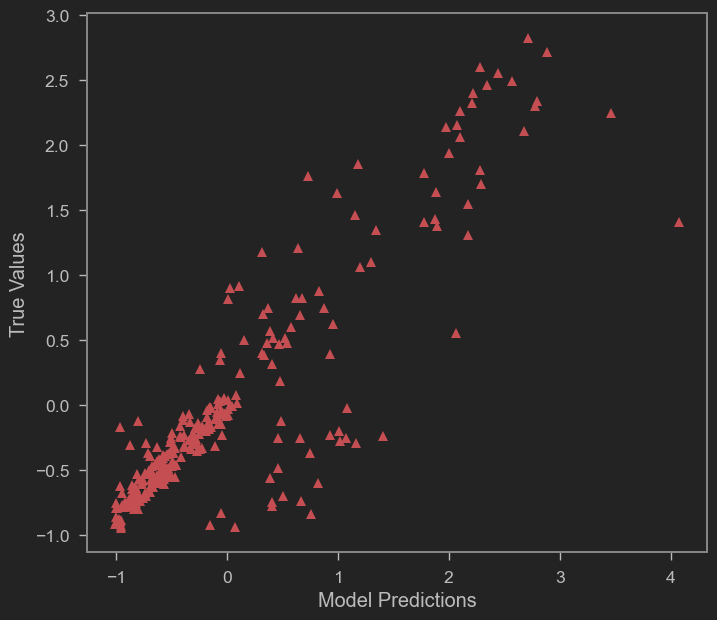

In [71]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [72]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


<Axes: >

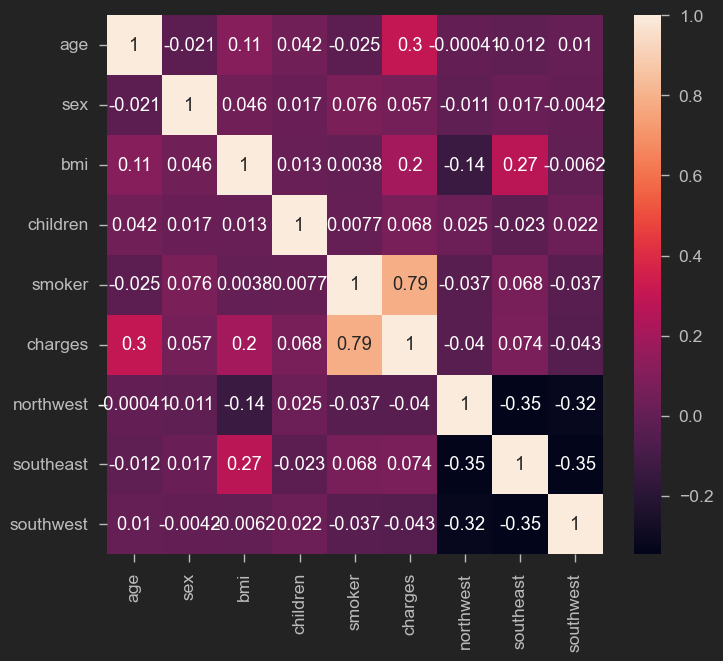

In [73]:
sns.heatmap(df.corr(),annot=True)

# 9.Train and evaluate GradientBoosting Regressor Model

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
X_df=df[['age','bmi','smoker','children']]
#if we consider age,bmi,smoker factors it gave accuracy of 86%
Y_df=df[['charges']]
#redistribution of data [standard scaler=0-1] reduced accuracy

In [97]:
x_t,x_te,y_t,y_te=train_test_split(X_df,Y_df)

In [98]:
x_t

,age,bmi,smoker,children
376,39,24.890,1,3
1203,51,32.300,0,1
228,41,31.635,0,1
964,52,36.765,0,2
351,50,25.600,0,0
...,...,...,...,...
321,26,29.640,0,4
771,53,26.700,0,2
819,33,35.530,1,0
659,57,28.785,0,4


In [99]:
y_t

,charges
376,21659.93010
1203,9964.06000
228,7358.17565
964,26467.09737
351,8932.08400
...,...
321,24671.66334
771,11150.78000
819,55135.40209
659,14394.39815


In [100]:
gdr=GradientBoostingRegressor()
gdr.fit(x_t,y_t)

GradientBoostingRegressor()

In [101]:
ac = gdr.score(x_te, y_te)
ac

0.8424585979207345

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.457 
MSE = 0.20861933 
MAE = 0.26644534 
R2 = 0.7820213663351907 
Adjusted R2 = 0.7752884355656213


Among all models,Gradient Boosting Regressor model gave more accurate predictions

In [104]:
import joblib
import pickle as pkl

In [105]:
joblib.dump(gdr,'Models/final_model.pkl')

['Models/final_model.pkl']